In [1]:
#### Import packages needed (and some not needed....)

import Bio

import openpyxl
from Bio import SeqIO
import os,sys,re

import pandas as pd
print(pd.__name__, pd.__version__)

import numpy as np
print(np.__name__, np.__version__)

import matplotlib.pyplot as plt
import matplotlib
print(matplotlib.__name__, matplotlib.__version__)
from matplotlib.colors import LogNorm, Normalize
from matplotlib.ticker import MaxNLocator

import scipy.stats as stats
import scipy
print(scipy.__name__, scipy.__version__)

import seaborn as sns
print(sns.__name__, sns.__version__)

from collections import Counter

import scipy as sp
import math
from scipy.stats import shapiro 
from scipy.stats import lognorm
from statsmodels.formula.api import ols
import statsmodels.formula.api as smf
from scipy.stats import ttest_ind
from statsmodels.stats.multitest import multipletests
from scipy.stats import ttest_rel

pandas 1.5.2
numpy 1.23.5
matplotlib 3.4.1
scipy 1.10.0
seaborn 0.12.2


In [2]:
#DNA and codons

Ca_ERG11 = "ATGGCCATTGTTGAAACGGTAATAGATGGAATCAACTATTTTTTATCACTGTCTGTAACTCAACAAATTAGTATATTACTAGGGGTCCCGTTTGTGTACAATCTGGTTTGGCAGTATTTATATAGTCTAAGAAAAGATAGAGCACCCCTGGTATTCTATTGGATACCCTGGTTCGGCTCAGCAGCGTCTTATGGTCAACAACCGTATGAATTTTTTGAGTCATGCAGGCAGAAATATGGCGATGTTTTTTCCTTTATGCTTCTTGGGAAAATAATGACTGTGTACCTTGGCCCAAAGGGTCACGAATTTGTCTTCAATGCGAAGTTAAGCGATGTCTCTGCTGAAGATGCATACAAACACTTAACAACTCCGGTATTCGGAAAGGGAGTTATCTACGATTGTCCCAACAGTCGTCTGATGGAGCAGAAAAAGTTTGCTAAATTCGCGCTTACTACGGACTCATTCAAAAGGTATGTACCCAAAATTCGTGAAGAAATATTAAACTATTTCGTAACAGACGAAAGTTTCAAATTAAAGGAAAAGACACACGGCGTGGCTAACGTGATGAAAACACAACCTGAAATCACCATTTTTACCGCCAGCAGGTCCTTATTTGGCGACGAGATGAGAAGAATTTTCGATAGAAGTTTTGCTCAACTGTACTCAGATTTGGATAAAGGTTTTACTCCGATAAATTTCGTGTTCCCAAACCTTCCTTTGCCACACTATTGGAGAAGAGATGCTGCACAAAAGAAGATAAGTGCGACCTATATGAAAGAGATAAAATCCCGTAGGGAAAGGGGTGACATTGACCCTAACAGAGACTTGATTGATTCTCTGCTGATTCATAGCACATACAAAGACGGTGTGAAGATGACCGACCAGGAGATTGCAAACCTGCTTATAGGTATTTTAATGGGTGGACAGCACACATCAGCTTCTACGTCAGCATGGTTTCTGCTACACCTGGGGGAAAAACCGCACCTACAAGACGTAATATATCAAGAGGTGGTGGAGTTACTAAAAGAGAAAGGAGGCGATCTAAACGATTTAACCTATGAGGATCTGCAAAAATTGCCGTCAGTCAACAACACGATCAAGGAAACGCTAAGGATGCACATGCCTCTACACAGTATATTCAGAAAAGTTACTAACCCACTTAGGATCCCTGAAACCAACTACATCGTCCCAAAAGGACACTACGTTCTTGTCAGCCCAGGCTACGCACACACGAGTGAGAGATACTTTGATAACCCGGAGGATTTTGATCCTACACGTTGGGATACTGCTGCAGCCAAAGCCAATTCTGTAAGCTTTAACTCCAGTGATGAGGTAGATTACGGCTTTGGGAAAGTATCAAAAGGCGTCAGCTCACCATATCTTCCCTTCGGTGGCGGTAGACATAGATGTATAGGTGAACAATTTGCATACGTTCAGCTGGGAACCATATTAACGACGTTTGTTTATAACTTGAGATGGACTATCGACGGGTATAAAGTCCCTGATCCTGACTATAGCTCTATGGTTGTTctaCCCACCGAACCGGCTGAAATAATTTGGGAGAAAAGAGAGACATGTATGTTTTGA"

DNA_Codons = {"GCT": "A", "GCC": "A", "GCA": "A", "GCG": "A","TGT": "C", "TGC": "C",
    "GAT": "D", "GAC": "D","GAA": "E", "GAG": "E","TTT": "F", "TTC": "F",
    "GGT": "G", "GGC": "G", "GGA": "G", "GGG": "G","CAT": "H", "CAC": "H","ATA": "I", "ATT": "I", "ATC": "I",
    "AAA": "K", "AAG": "K", "TTA": "L", "TTG": "L", "CTT": "L", "CTC": "L", "CTA": "L", "CTG": "L",
    "ATG": "M","AAT": "N", "AAC": "N","CCT": "P", "CCC": "P", "CCA": "P", "CCG": "P","CAA": "Q", "CAG": "Q",
    "CGT": "R", "CGC": "R", "CGA": "R", "CGG": "R", "AGA": "R", "AGG": "R","TCT": "S", "TCC": "S", "TCA": "S", 
    "TCG": "S", "AGT": "S", "AGC": "S","ACT": "T", "ACC": "T", "ACA": "T", "ACG": "T",
    "GTT": "V", "GTC": "V", "GTA": "V", "GTG": "V","TGG": "W","TAT": "Y", "TAC": "Y","TAA": "*", "TAG": "*", "TGA": "*"}

In [3]:
#open df with wt positions

WT_annot = pd.read_excel('../wt_aa_annot.xlsx', header=0)

aa_wt1 = pd.melt(WT_annot, id_vars=['aa'])

#keep only WT rows

aa_wt1 = aa_wt1[aa_wt1['value'] == 'o'].reset_index(drop=True)

#make a dictionnary of position + wt aa

aa_dict = dict(zip(aa_wt1['variable'], aa_wt1['aa']))

In [4]:
df_none = pd.read_csv("../Nothing/Select_coeff_median_replicates_No antifungal_NovaSeq_winter2023_albicans_2023-12-07.csv", header=0)
df_fluco = pd.read_csv("../Fluconazole/Select_coeff_median_replicates_Fluconazole_NovaSeq_winter2023_albicans_2023-12-06.csv", header=0)
df_itra = pd.read_csv("../Itraconazole/Select_coeff_median_replicates_Itraconazole_NovaSeq_winter2023_albicans_2023-12-06.csv", header=0)
df_vorico = pd.read_csv("../Voriconazole/Select_coeff_median_replicates_Voriconazole_NovaSeq_winter2023_albicans_2023-12-06.csv", header=0)
df_posaco = pd.read_csv("../Posaconazole/Select_coeff_median_replicates_Posaconazole_NovaSeq_winter2023_albicans_2023-12-06.csv", header=0)
df_isa = pd.read_csv("../Isavuconazole/Select_coeff_median_replicates_Isavuconazole_NovaSeq_winter2023_albicans_2023-12-06.csv", header=0)
df_clotri = pd.read_csv("../Clotrimazole/Select_coeff_median_replicates_Clotrimazole_NovaSeq_winter2023_albicans_2023-12-06.csv", header=0)

In [5]:
df_c = pd.concat([df_none, df_fluco,df_itra,df_vorico,df_posaco,df_isa, df_clotri],axis=0)

df_c

Unnamed: 0  position codon Antifungal Fragment aa  freq_tp0  freq_tp3  \
0              0        55   AAA       None       F1  K  0.000152  0.000144   
1              1        55   AAC       None       F1  N  0.000111  0.000120   
2              2        55   AAG       None       F1  K  0.000159  0.000152   
3              3        55   AAT       None       F1  N  0.000090  0.000093   
4              4        55   ACC       None       F1  T  0.000084  0.000085   
...          ...       ...   ...        ...      ... ..       ...       ...   
7987        7987       511   TGT     Clotri       F4  C  0.000203       NaN   
7988        7988       511   TTA     Clotri       F4  L  0.000151       NaN   
7989        7989       511   TTC     Clotri       F4  F  0.000122       NaN   
7990        7990       511   TTG     Clotri       F4  L  0.000182       NaN   
7991        7991       511   TTT     Clotri       F4  F  0.000152       NaN   

      l2fc_0_3  nbr_tp0  nbr_tp3   nbr_gen  select_coef  freq_tp2  l2fc_0_2  \
0     0.206612    980.0    864.0  8.065874    -0.011206       NaN       NaN   
1     0.111424    823.0    722.0  8.065874    -0.009938       NaN       NaN   
2     0.040378   1111.0    881.0  8.065874    -0.017044       NaN       NaN   
3     0.012748    680.0    542.0  8.065874    -0.016186       NaN       NaN   
4     0.238805    528.0    511.0  8.065874    -0.006999       NaN       NaN   
...        ...      ...      ...       ...          ...       ...       ...   
7987       NaN    718.0      NaN  8.644147     0.033840  0.000139 -0.285393   
7988       NaN    532.0      NaN  8.644147    -0.026699  0.000065 -1.170985   
7989       NaN    431.0      NaN  8.644147     0.371550  0.000718  2.556636   
7990       NaN    644.0      NaN  8.644147    -0.021810  0.000096 -0.918240   
7991       NaN    537.0      NaN  8.644147     0.363786  0.000854  2.511750   

      nbr_tp2  
0         NaN  
1         NaN  
2         NaN  
3         NaN  
4         NaN  
...       ...  
7987    502.0  
7988    228.0  
7989   2194.0  
7990    290.0  
7991   2576.0  

[55944 rows x 16 columns]

In [6]:
#add the corresponding aa to a list using the dictionary we define at the beginning and add to the df

aa_list = []

for _, row in df_c.iterrows():
    codon = row['codon']
    aa = DNA_Codons.get(codon)
    aa_list.append(aa)
    
df_c["aa"] = aa_list

0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0


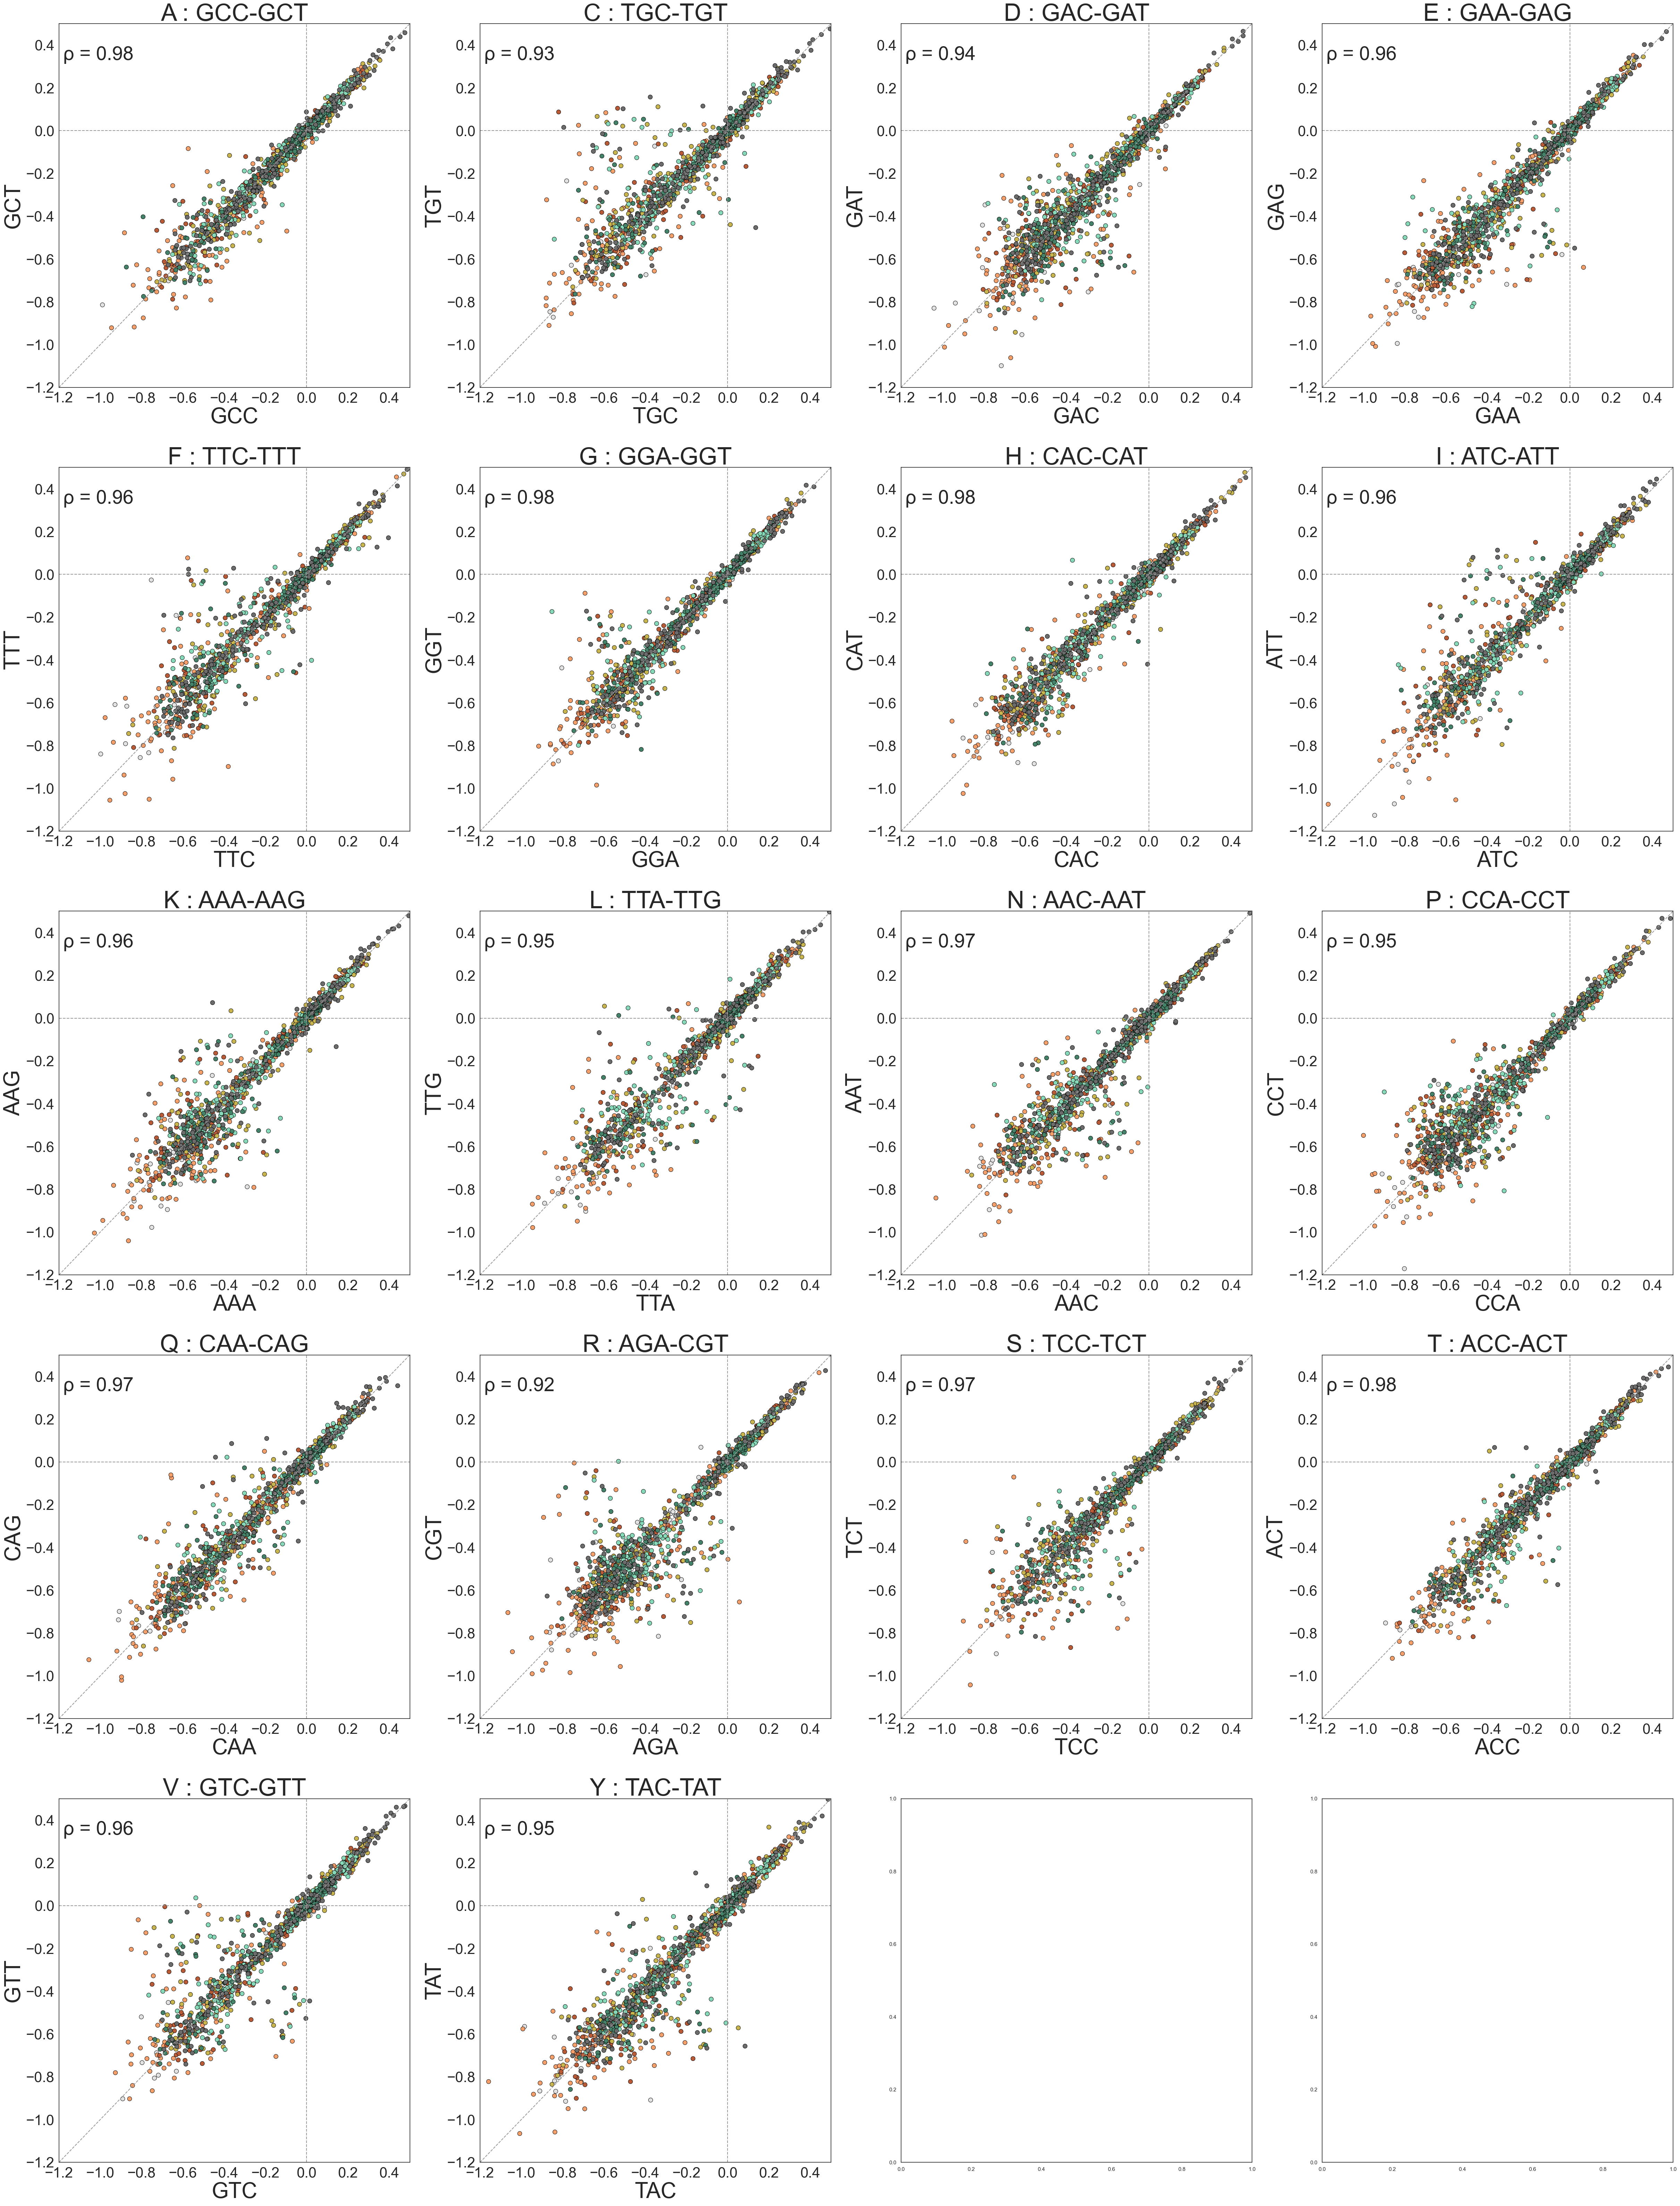

In [8]:
df_co = df_c.reset_index()

custom_palette = sns.blend_palette(["#E2E2E2","#F59F6A","#B85B36","#CAB54D","#86DAB9","#44836A","#6C6C6C"],n_colors=7)
new_legend_labels = ["No antifungal", "Fluconazole",  "Itraconazole","Voriconazole", "Posaconazole", "Isavuconazole", "Clotrimazole"]
legend_labels_mapping = {
    "None": "No antifungal",
    "Fluco": "Fluconazole",
    "Itra": "Itraconazole",
    "Vorico": "Voriconazole",
    "Posaco": "Posaconazole",
    "Isa": "Isavuconazole",
    "Clotri": "Clotrimazole"
}

# remove wt as they often have only one codon

ite = 0  
num = 0

for i in df_co.iterrows():  # Iterating over the rows of df_wt
    
    first_row = df_co.loc[ite]  # Accessing the row at index ite
    
    position = first_row['position']  # Extracting the value of 'position' column
    aa_wt = aa_dict[position]  # Getting the corresponding value from wt_dict
    
    if first_row['aa'] == aa_wt:  # Comparing 'codon' value with codon_wt
        
        df_co = df_co.drop(ite)  # Dropping the row at index ite
        num += 1
        
    ite = ite + 1 

df_cod = df_co.groupby(["codon"])
df_aa = df_co.groupby(["aa"])

syn_list = ["A","C","D","E","F","G","H","I","K","L","N","P","Q","R","S","T","V",'Y']

row = 0
sns.set_theme(style="white")
fig, axes = plt.subplots(5, 4, figsize=(60,80))
axes = axes.flatten()
    
for aa in syn_list :
    
    sns.set_theme(style="white")
    
    colors = ["#386461","#F6EA0E","#CF6448","#6C44A6"]
    sns.set_palette(sns.color_palette(colors))
    
    amac = df_aa.get_group(aa)
    
    codons = amac['codon'].unique()
    
    cod1 = codons[0]
    cod2 = codons[1]

    cod_df = amac.groupby("codon")
    
    codon1 = cod_df.get_group(cod1).reset_index()
    codon2 = cod_df.get_group(cod2).reset_index()
    
    sns.scatterplot(x = codon1["select_coef"], y = codon2["select_coef"], legend=False,
                    hue = codon1["Antifungal"], palette = custom_palette, edgecolor="black",s=80, ax = axes[row])
    axes[row].set_ylabel(cod2, fontsize=45)
    axes[row].set_xlabel(cod1, fontsize=45)
    title = aa + " : " + cod1 + "-" + cod2
    axes[row].set_title(title, fontsize=50)
    axes[row].set_ylim(-1.2, 0.5)
    axes[row].set_xlim(-1.2, 0.5)
    
    x_vals = np.array([-1.2, 0.5])
    y_vals = x_vals
    
    result = sp.stats.spearmanr(codon1["select_coef"], codon2["select_coef"])
    coeff = result[0]
    p_value = result[1]
    print(str(p_value))
    R2 = coeff**2 
    
    text = "ρ = " + str(round(coeff, 2)) 
    #+ "\np-value = "  + str(p_value)
    axes[row].text(-1.18, 0.33, text, fontsize=40)

    # Plot the diagonal line
    axes[row].plot(x_vals, y_vals, '--', color="#989898")
    axes[row].axhline(y=0, linestyle='--', color='#989898')
    axes[row].axvline(x=0, linestyle='--', color='#989898')
    axes[row].tick_params(axis='both', which='both', labelsize=30)
    
        # Set specific tick positions
    axes[row].set_xticks([-1.2, -1.0, -0.8, -0.6, -0.4, -0.2, 0.0, 0.2, 0.4])
    axes[row].set_yticks([-1.2, -1.0, -0.8, -0.6, -0.4, -0.2, 0.0, 0.2, 0.4])
    #legend = axes[row].legend(title="", loc='lower right',prop={'size': 40}, frameon=False)

    #for handle in legend.legendHandles:
        #handle._sizes = [50]  # You can adjust the size as needed to get square markers
    
    #for text in legend.texts:
        #old_label = text.get_text()
        #new_label = legend_labels_mapping.get(old_label, old_label)
        #text.set_text(new_label)
    
    row += 1
    
plt.subplots_adjust(wspace=0.2, hspace=0.22)

plt.rcParams['svg.fonttype'] = 'none'
name = "Correlation_between_synonymous_codons_all_conditions_CB_2023-10-16"


plt.savefig(f"c:{name}.png", format='png', transparent=True, dpi=400)
plt.savefig(f"c:{name}.svg", format='svg', transparent=True, dpi=400)